# MiNet: A Convolutional Neural Network for the Detection of Minerals

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data

In [3]:
path = Path('data/minet')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
np.random.seed(352)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

**let's take a look at some of the images**

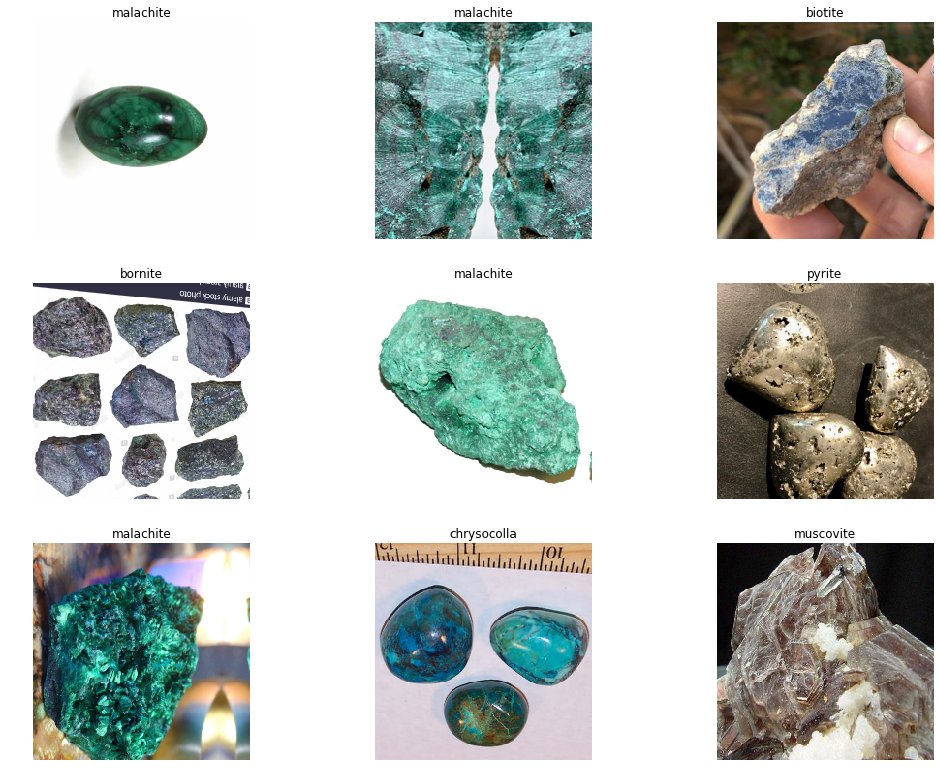

In [6]:
data.show_batch(3, figsize=(15, 11))

In [7]:
data.classes

['biotite',
 'bornite',
 'chrysocolla',
 'malachite',
 'muscovite',
 'pyrite',
 'quartz']

## Model

In [8]:
learn = cnn_learner(data, models.densenet121, metrics=error_rate)

/opt/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


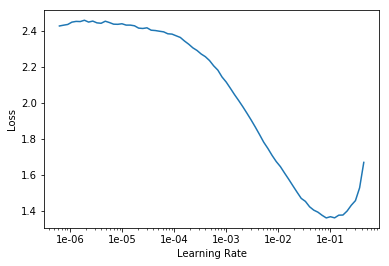

In [10]:
learn.recorder.plot()

In [11]:
lr = 1e-2
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.072933,0.575481,0.194737,00:16
1,0.727414,0.296774,0.084211,00:13
2,0.551743,0.269584,0.094737,00:14
3,0.449408,0.212229,0.078947,00:16
4,0.366242,0.221726,0.089474,00:15


In [12]:
learn.save('stage-1-dn121-without')

### Unfreeze and finetune

In [13]:
learn.load('stage-1-dn121');

In [14]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


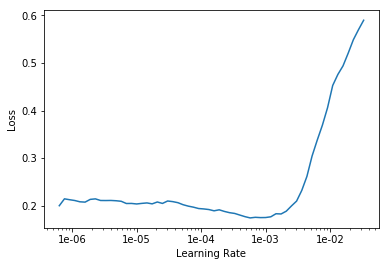

In [15]:
learn.recorder.plot()

In [16]:
learn.fit(10, slice(1e-4, lr/10))

epoch,train_loss,valid_loss,error_rate,time
0,0.291209,0.392267,0.142105,00:14
1,0.255217,0.242332,0.084211,00:15
2,0.201058,0.198909,0.073684,00:16
3,0.186898,0.201431,0.073684,00:15
4,0.167386,0.268988,0.084211,00:16
5,0.140217,0.181237,0.063158,00:15
6,0.122352,0.244398,0.084211,00:15
7,0.104962,0.286710,0.063158,00:15
8,0.095193,0.265672,0.089474,00:15
9,0.085411,0.279502,0.068421,00:15


In [17]:
learn.save('stage-2-dn121-without')

In [18]:
learn.export('dn121-without.pkl')

## Model Interpretation

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(4)

In [ ]:
interp.plot_confusion_matrix(dpi=130)

number of images in training and validation sets

In [21]:
len(data.train_ds), len(data.valid_ds)

(761, 190)

total number of images

In [22]:
761 + 190

951

In [23]:
classes = data.classes

In [24]:
for clas in classes:
    print(f'{clas}: {len(get_image_files(path/clas))}')

biotite: 68
bornite: 171
chrysocolla: 162
malachite: 235
muscovite: 79
pyrite: 99
quartz: 137


In [25]:
68 + 171 + 162 + 235 + 79 + 99 + 137

951